## Predicting Customer Churn
### Aim: Identifying Customers that are Susceptible to Churn in order to Enhance Retention Strategies and Boost Business Growth.

In [169]:
# Import libraries
from ast import literal_eval

import pandas as pd 
import numpy as np 

# Import visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import ML Libraries 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm # Visualize progress of python loops

# Import warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [170]:
# Import the dataset
df = pd.read_excel('../Customer_Churn_Prediction/Dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


### Data Exploration
- Understanding the data structure, statistics, and quality of the dataset,
- Visualizing the data to gain insights,
- Check for missing values.

In [171]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [172]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [173]:
# Statistical overview of the numerical columns
stats_overview = df.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


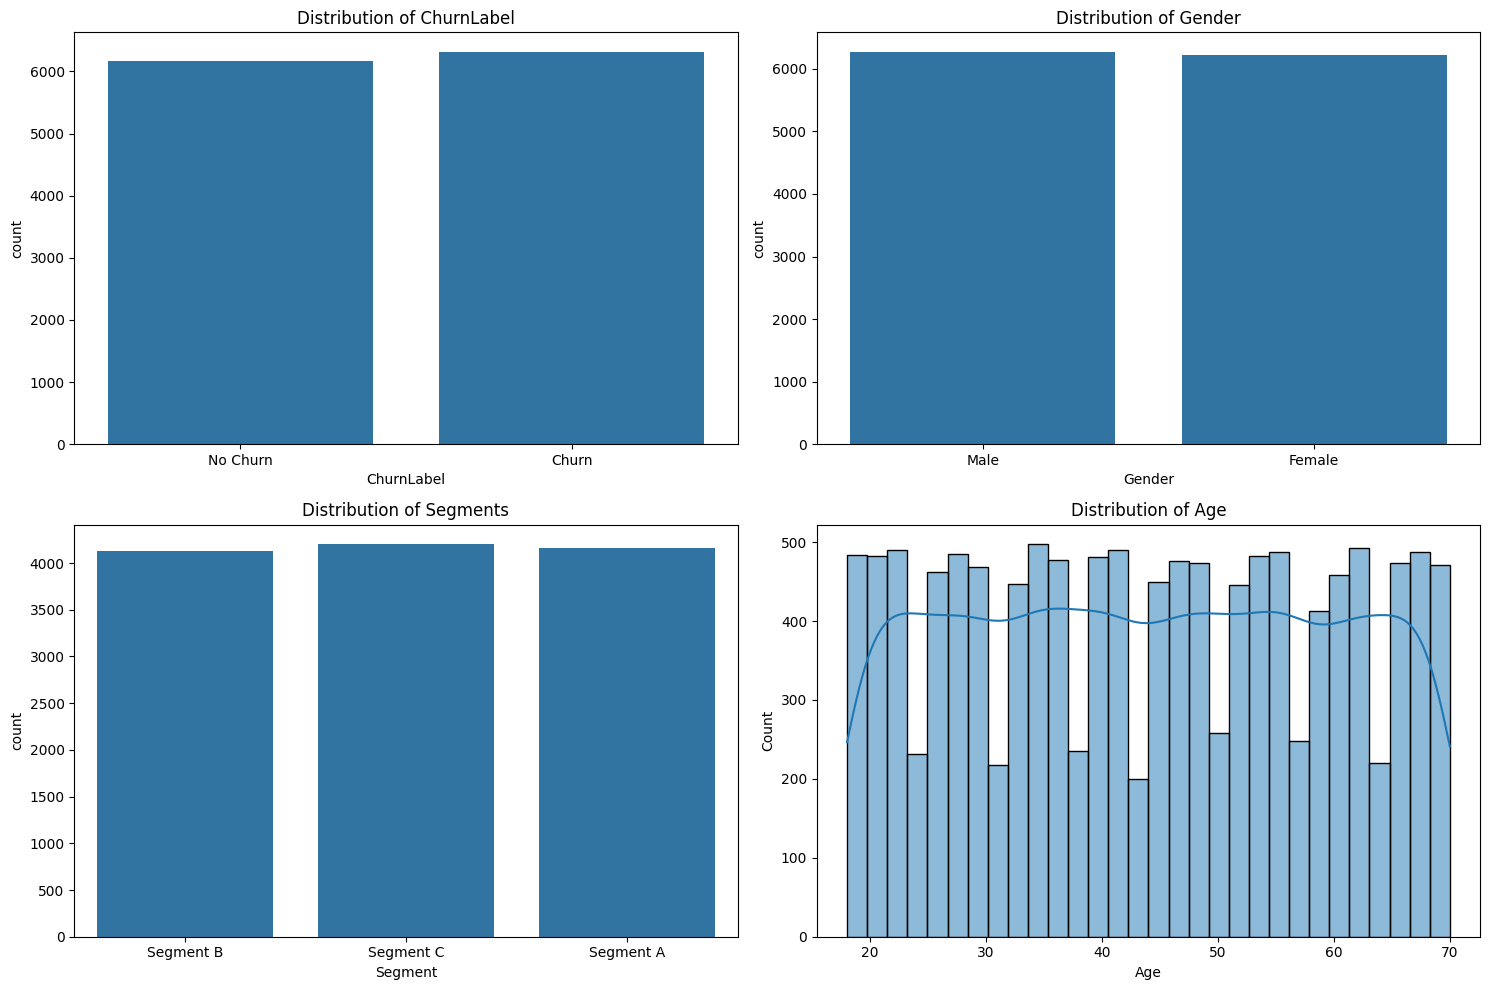

In [202]:
# Set up the figure and the axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot distribution of the target variable ChurnLabel
sns.countplot(data=df, x='ChurnLabel', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])


# Plot Distribution of Gender
sns.countplot(data=df, x='Gender', ax=ax[0, 1])
ax[0, 1].set_title("Distribution of Gender")

# Plot Distribution of Segments
sns.countplot(data=df, x='Segment', ax=ax[1, 0])
ax[1, 0].set_title("Distribution of Segments")

# Plot Distribution of Age
sns.histplot(df['Age'], ax=ax[1, 1], bins=30, kde=True)
ax[1, 1].set_title("Distribution of Age")

plt.tight_layout()
plt.show()

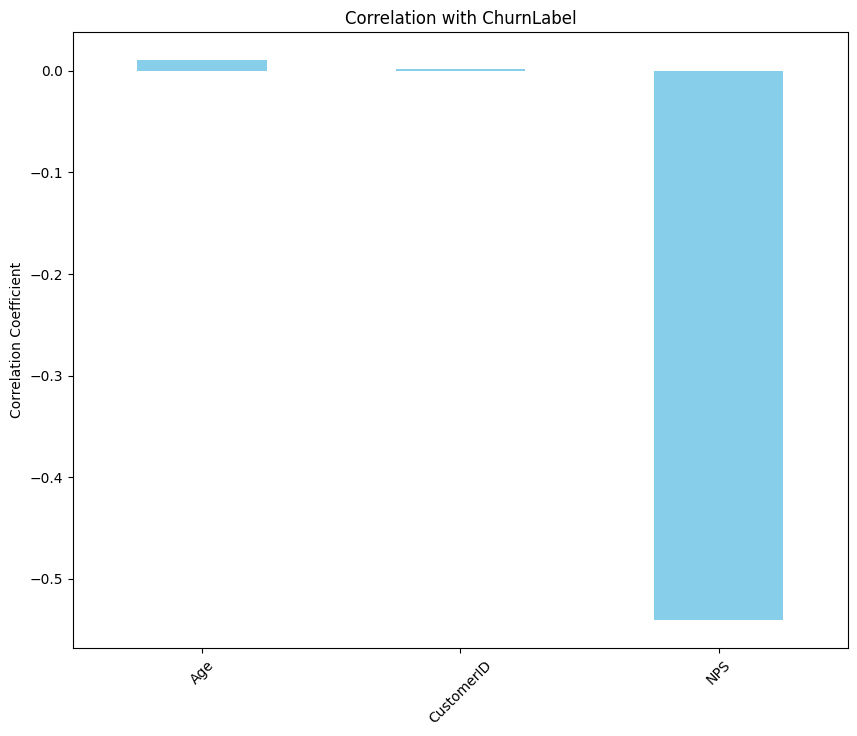

In [175]:
# Correlation Analysis: Which columns in the dataset correlates with the `ChurnLabel` column
correlation = df.select_dtypes(include=[np.number]).corr()['ChurnLabel'].sort_values(ascending=False)


# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.title('Correlation with ChurnLabel')
plt.ylabel("Correlation Coefficient");

## Nested Columns Explorations
They include:
- PurchaseHistory     
- SubscriptionDetails
- ServiceInteractions    
- PaymentHistory       
- WebsiteUsage   
- ClickstreamData  
- EngagementMetrics  
- Feedback
- MarketingCommunication

In [176]:
nested_columns = [
    'PurchaseHistory', 
    'SubscriptionDetails', 
    'ServiceInteractions', 
    'PaymentHistory', 
    'WebsiteUsage', 
    'ClickstreamData', 
    'EngagementMetrics', 
    'Feedback', 
    'MarketingCommunication'
    ]   

# Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print("\n| {:<{w1}} | {:<{w2}} |".format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temporal Analysis: How Churn rate varies over time, to see if there are any trends or patterns in the data

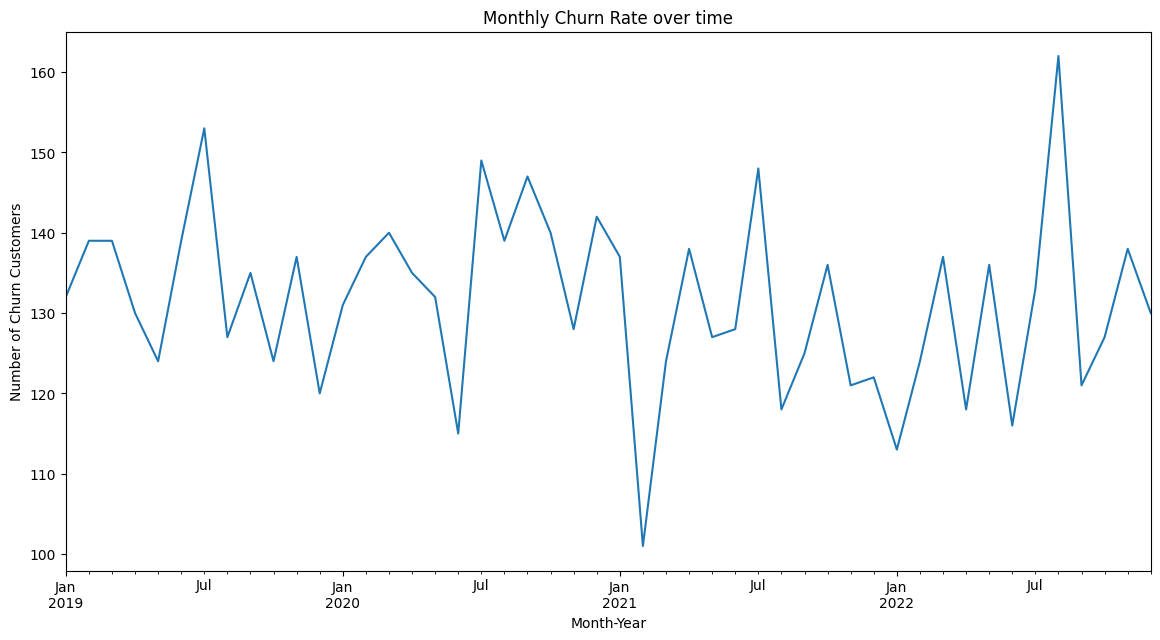

In [177]:

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month and year from the timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Group by month and year, and calculate the churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate over time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Churn Customers')
plt.show()

Identify patterns in Customer Feedback `Rating` and the `ChurnLabel`


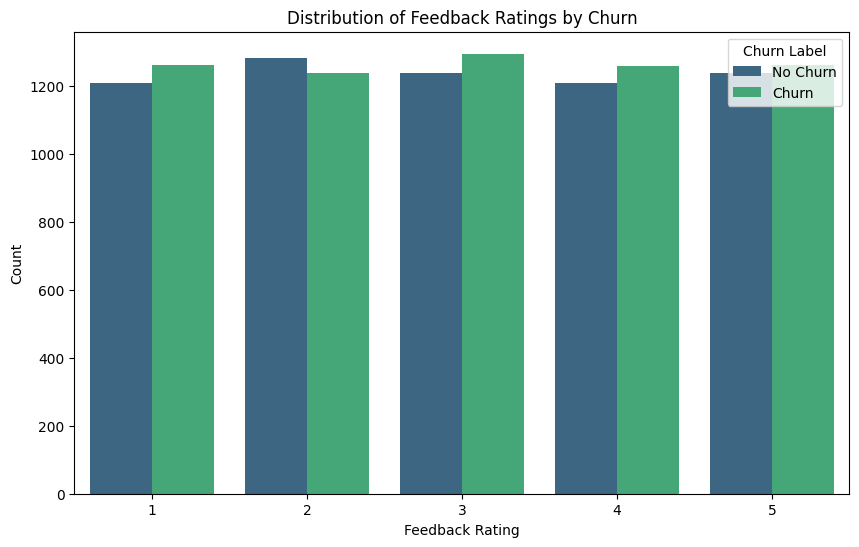

In [178]:
# Extracting rating from feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plot the distribution of feedback ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Distribution of Feedback Ratings by Churn')
plt.xlabel('Feedback Rating')
plt.ylabel('Count')
plt.legend(title='Churn Label', loc='upper right', labels=['No Churn', 'Churn'])
plt.show();


No indication that the `Feedback` rating affects the `ChurnLabel`.

## Data Preprocessing and Feature Engineering
Involves:
- Creating new features that may have predictive power,
- Convert categorical variables to numeric variables, using encoding techniques,
- Scale or normalize numeric variables if necessary,
- Split the data into training and testing subsets,
- Remove irrelevant features.



In [179]:
# Convert nested values from string formats to list/dictionaries using `literal_eval` function
nested_columns = [
    'PurchaseHistory', 
    'SubscriptionDetails', 
    'ServiceInteractions', 
    'PaymentHistory', 
    'WebsiteUsage', 
    'ClickstreamData', 
    'EngagementMetrics', 
    'Feedback', 
    'MarketingCommunication'
]

# Apply the literal_eval function to each of the nested columns
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [180]:
# PurchaseHistory
df['PurchaseProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComments'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Sent']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)

### Extract three columns
- ServiceInteractionc,
- PaymentHistory,
- ClickstreamData

In [181]:
# Check for the unique parameters/values in these columns
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set(i['Type'] for i in x)))
service_interaction_types = service_interaction_types.to_list()

unique_service_interaction_types = []
for i in service_interaction_types:
    unique_service_interaction_types.extend(i)
unique_service_interaction_types = list(set(unique_service_interaction_types))
print('All Unique Service Interaction Types:', unique_service_interaction_types)

# Get all unique PaymentHistory 'Method' 
payment_history_method = df['PaymentHistory'].apply(lambda x: list(set(i['Method'] for i in x)))
payment_history_method = payment_history_method.to_list()
unique_payment_history_methods = []
for i in payment_history_method:
    unique_payment_history_methods.extend(i) 
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All Unique Payment History Method:', unique_payment_history_methods)

# Get all unique ClickstreamData 'Page'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set(i['Action'] for i in x)))
clickstream_data_actions = clickstream_data_actions.to_list() 
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All Unique Clickstream Data Page:', unique_clickstream_data_actions)

All Unique Service Interaction Types: ['Call', 'Chat', 'Email']
All Unique Payment History Method: ['Credit Card', 'Bank Transfer', 'PayPal']
All Unique Clickstream Data Page: ['Click', 'Search', 'Add to Cart']


In [182]:
# Encode the three columns
# ServiceInteractions
for usit in unique_service_interaction_types:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))
    


In [183]:
# See a subset of new data
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgOfLatePayments,ClickstreamData_Click,ClickstreamData_Search,ClickstreamData_Add to Cart
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,-818.0,1,2,1,40,13.333333,4,12,8
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,-110.0,5,4,10,10,3.333333,9,7,8
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,-333.0,1,1,1,8,2.666667,3,7,2
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,-159.0,17,24,18,79,26.333333,16,16,15
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,-193.0,4,1,5,2,0.666667,9,4,17


In [184]:
# Check all columns we have
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchaseProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComments',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgOfLatePayments',
       'ClickstreamData_Clic

### Pick necessary columns

In [185]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'PaymentHistoryAvgOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Search',
    'ClickstreamData_Add to Cart',
    'SubscriptionDuration'
]]
df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgOfLatePayments,ClickstreamData_Click,ClickstreamData_Search,ClickstreamData_Add to Cart,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,-818.0,1,1,2,40,13.333333,4,12,8,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,-110.0,5,10,4,10,3.333333,9,7,8,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,-333.0,1,1,1,8,2.666667,3,7,2,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,-159.0,17,18,24,79,26.333333,16,16,15,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,-193.0,4,5,1,2,0.666667,9,4,17,580


In [186]:
# Present columns
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgOfLatePayments',
       'ClickstreamData_Click', 'ClickstreamData_Search',
       'ClickstreamData_Add to Cart', 'SubscriptionDuration'],
      dtype='object')

In [187]:
df_.loc[0]

Age                                           31
Gender                                      Male
NPS                                            3
ChurnLabel                                     1
PurchaseFrequency                             38
PurchaseValue                            3994.72
SubscriptionPlan                         Express
WebsitePageViews                              49
WebsiteTimeSpent                              15
EngagementMetricsLogins                       19
EngagementMetricsFrequency                Weekly
FeedbackRating                                 1
MarketingCommunicationNoOfEmails               8
MarketingCommunicationOpenClickDiff        319.0
MarketingCommunicationSentOpenDiff        -818.0
ServiceInteractions_Call                       1
ServiceInteractions_Email                      1
ServiceInteractions_Chat                       2
PaymentHistoryNoOfLatePayments                40
PaymentHistoryAvgOfLatePayments        13.333333
ClickstreamData_Clic

### Data Encoding : Endcoding unique parameters
- Gender
- SubscriptionPlan
- EngagementMetricsFrequency

In [188]:
print('Total dataset length:', len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

In [189]:
# Gender Encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan Encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency Encoding
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_metrics_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_metrics_map)


In [190]:
df_.loc[0]

Age                                           31
Gender                                         0
NPS                                            3
ChurnLabel                                     1
PurchaseFrequency                             38
PurchaseValue                            3994.72
SubscriptionPlan                               0
WebsitePageViews                              49
WebsiteTimeSpent                              15
EngagementMetricsLogins                       19
EngagementMetricsFrequency                     0
FeedbackRating                                 1
MarketingCommunicationNoOfEmails               8
MarketingCommunicationOpenClickDiff        319.0
MarketingCommunicationSentOpenDiff        -818.0
ServiceInteractions_Call                       1
ServiceInteractions_Email                      1
ServiceInteractions_Chat                       2
PaymentHistoryNoOfLatePayments                40
PaymentHistoryAvgOfLatePayments        13.333333
ClickstreamData_Clic

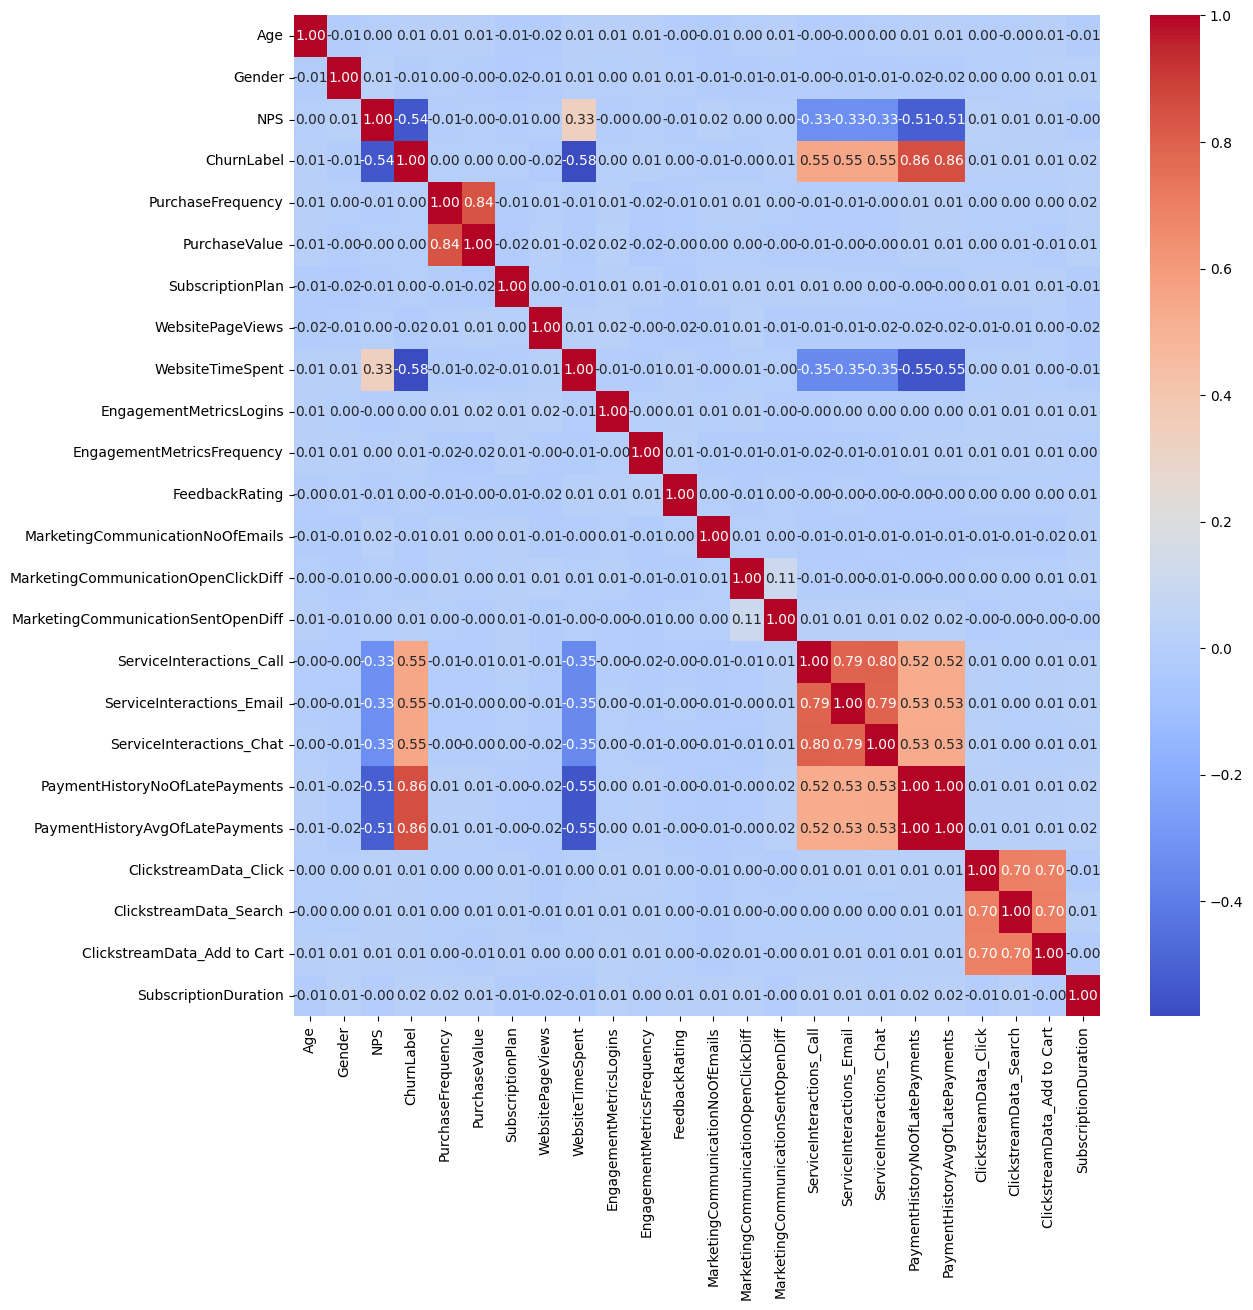

In [191]:
# Plot correlation matrix
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.show()

In [192]:
# Split data into train, test, and validation sets
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [193]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Modelling and Evaluation
`Modelling Algorithms:`
- LogisticRegression
- DecisionTreeClassifier

`Evaluation Metrics:`
- Accuracy score
- Precision score
- Recall score
- F1 score

In [194]:
def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)
    
    print(f'{subset} Accuracy Score:{accuracy_score(y, y_pred):.4f}')
    print(f'{subset} Precision Score:{precision_score(y, y_pred):.4f}')
    print(f'{subset} Recall Score:{recall_score(y, y_pred):.4f}')
    print(f'{subset} F1 Score:{f1_score(y, y_pred):.4f}')
    # print(f'{subset} Confusion Matrix:\n{confusion_matrix(y, y_pred)}')
    

### Modelling with Logistic Regression

In [195]:
# Build the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on train and validation subsets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score:0.9716
Train Precision Score:0.9751
Train Recall Score:0.9681
Train F1 Score:0.9715
Validation Accuracy Score:0.9672
Validation Precision Score:0.9755
Validation Recall Score:0.9591
Validation F1 Score:0.9672


### Modelling with Decision Trees

In [196]:
# Build the model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Evaluate the model on train and validation subsets
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')

Train Accuracy Score:0.9812
Train Precision Score:0.9793
Train Recall Score:0.9832
Train F1 Score:0.9813
Validation Accuracy Score:0.9705
Validation Precision Score:0.9748
Validation Recall Score:0.9665
Validation F1 Score:0.9706


### Evaluation on the Test Set

In [197]:
evaluate(X_test, y_test, lr, 'LogisticRegression')
evaluate(X_test, y_test, dt, 'DecisionTreeClassifier')


LogisticRegression Accuracy Score:0.9686
LogisticRegression Precision Score:0.9763
LogisticRegression Recall Score:0.9623
LogisticRegression F1 Score:0.9692
DecisionTreeClassifier Accuracy Score:0.9720
DecisionTreeClassifier Precision Score:0.9733
DecisionTreeClassifier Recall Score:0.9721
DecisionTreeClassifier F1 Score:0.9727


### Plot the Confusion Matrix

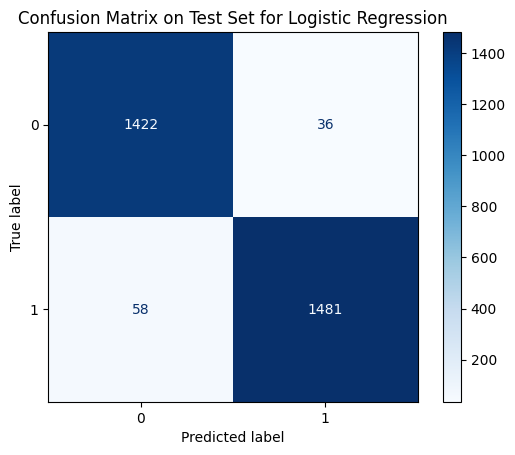

In [198]:
# Plot confusion matrix for Logistic Regression
lr_y_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_y_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
# cm_lr = confusion_matrix(y_test, lr.predict(X_test))
disp_lr.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

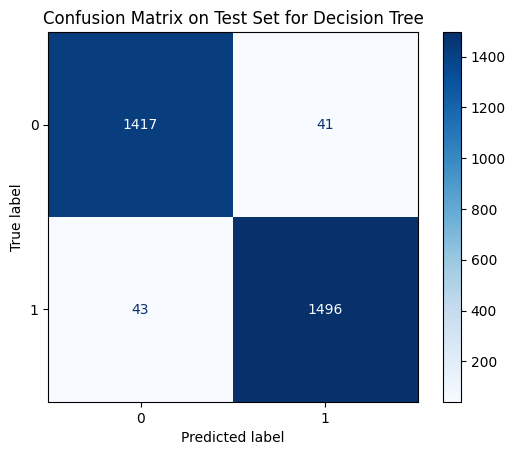

In [199]:
# Plot confusion matrix for Decision Tree
dt_y_pred = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, dt_y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
# cm_dt = confusion_matrix(y_test, dt.predict(X_test))
disp_dt.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()

### Conclusion

The most important features:
- The number of Service Interactions the customer has had through `Call`, `Email`, and `Chat`, 
- The number of times the customer has made `Late Payments`,
- The time spent on the company's website,
- The `Net Promoter Score (NPS)`.